<h1><center>Análise de Agrupamento</center></h1>

<h2>Introdução</h2>

Esse é um exercício de análise de agrupamento do curso <a href='https://www.udemy.com/the-data-science-course-complete-data-science-bootcamp/'>The Data Science Course 2019: The Complete Data Science Bootcamp</a>, onde nos é dado um dataset dos países e devemos fazer uma análise de agrupamento usando a latitude e longitude dos países.<br>
Aproveitando este exercício, vou utilizar estes dados para dar continuidade no meu caderno de estudo no curso, que servirá posteriormente como fonte de revisão.

<a name='INDICE'></a>
<h2>Índice</h2>
<ol>
    <li><a href='#CLUSTER'>Cluster</a></li>
    <ol>
        <li><a href='#KMEANS'>K-means</a></li>
        <li><a href='#NOCLUSTER'>Definindo o número de clusters</a></li>
    </ol>
    <li><a href='#EXERCICIO'>Exercício</a></li>
    <ol>
        <li><a href='#BIBLIOTECA'>Importando as bibliotecas</a></li>
        <li><a href='#EXPLORAR'>Explorando os dados</a></li>
        <li><a href='#NUMCLUSTER'>Definindo o número de clusters</a></li>
        <li><a href='#AGRUPANDO'>Agrupando</a></li>
    </ol>
    <li><a href='#CONCLUSAO'>Conclusão</a></li>
</ol>

<a name='CLUSTER'></a>
<h2>Cluster</h2>

Análise de cluster ou análise de agrupamento, é uma técnica estatística multivariada que agrupa observações baseado nas suas <i>features</i> e tem como objetivo fazer um cluster maximizar a similaridade das suas observações e maximizar a dissimilaridade entre os clusters.<br>
Neste exercício usaremos a biblioteca <i>K-means</i>, que é um modelo que se baseia a na centróide dos pontos.

<a name='KMEANS'></a>
<h3>K-means</h3>

K-means é um modelo interativo que utiliza a distância euclidiana e a centróide de um agrupamento de pontos para definir cada ponto em cada grupo. Por se tratar de um modelo iterativo ele segue os seguintes passos:
<ol>
    <li><b>Escolher o número de clusters</b></li>
    <li><b>Especificar as cluster seeds.</b></li>
    Cluster seeds são as coordenadas inicias das centróides de cada cluster.
    <li><b>Atribuir cada ponto a uma centróide</b></li>
    Para isso o algorítmo calcula a distância euclidiana entre a observação e as centróides, e agrupa a observação no cluster de menor distância, usando a seguinte fórmula:
    \begin{align}
    \ d = \sqrt{(p_{1} - q_{1})^2 + (p_{2} - q_{2})^2 + \cdots + (p_{n} - q_{n})^2}
    \end{align}
    <br>
    <li><b>Ajustar as coordenadas das centróides</b></li>
    Após todos os pontos atribuídos para cada grupo, é ajustado as coordenadas desta centróide utilizando a média dos pontos.
    <li><b>Realizar novamente os passos 3 e 4.</b></li>
    É realizado os passos até que nenhuma observação troque de grupo.
    <br>
</ol>

![](./img/1_KrcZK0xYgTa4qFrVr0fO2w.gif)

<a name='NOCLUSTER'></a>
<h3>Definindo o número de clusters</h3>

Vendo os passos do K-means vemos um hiperparâmetro que é muito importante, o número de clusters. Porém como definimos o melhor número de clusters precisamos ter conhecimento de uma nova métrica, o <i>WCSS</i> ou <i>within-cluster sum of squares</i>, que é a distância entre pontos dentro de um cluster e quanto menor essa distância melhor, já que pela equação abaixo, quanto menor a distancia dentro dos cluster maior a distância entre clusters.<br>

\begin{align}
\ SS_{total} = SS_{within} +SS_{between}
\end{align}

Com isso é possível aplicar o <i>Método do Cotovelo</i>, que plota em um gráfico os valores do WCSS de acordo com o número de clusters, já que a função WCSS é monotamente descrescente que diminui rapidamente no começo até atingir o cotovelo, e após isso diminui lentamente com o aumentar dos clusters.

<img src='./img/images.png' width="400" height="400"/>

<a href='#INDICE'>Voltar para o índice</a>

<a name='EXERCICIO'></a>
<h2>Exercício</h2>

Após toda essa teoria, chegou a hora de colocarmos em prática. Para resolver esse exercício iremos utilizar a biblioteca K-Means, então será necessário importar algumas bibliotecas.<br>

<a name='BIBLIOTECA'></a>
<h3>Importando as bibliotecas</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
df = pd.read_csv('./Countries-exercise.csv')
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [3]:
df.isnull().sum()

name         0
Longitude    0
Latitude     0
dtype: int64

Como não há nenhum dado faltante, podemos começar a explorar o nosso dataset.

<a name='EXPLORAR'></a>
<h3>Explorando os dados</h3>

Primeiro vamos utilizar do método <i>describe</i> para vermos a tendência central e a dispersão dos nossos dados.

In [4]:
df.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


Após isso vamos plotar um gráfico de dispersão entre as variáveis para facilitar ainda mais a nosso visualização.

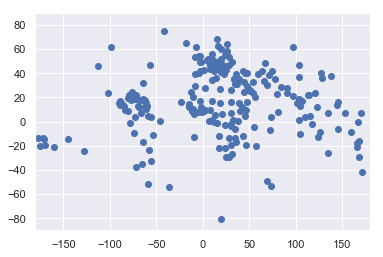

In [5]:
plt.scatter(df['Longitude'], df['Latitude']);
plt.xlim(-180,180);
plt.ylim(-90,90);

<a name='NUMCLUSTER'></a>
<h3>Definindo o número de clusters</h3>

Agora com os nossos dados plotados podemos utilizar o método do cotovelo para definirmos a quantidade de clusters. Primeiro ajustamos a nossa variável <i>x</i>, depois realizamos um for para obtermos o valor do WCSS de 1 até 10 grupos, e então traçamos o gráfico usando esses dois parâmetros.<br>
Pelos gráfico podemos ver que os melhores pontos são 2 ou 3, pois após isso não há uma grande queda do WCSS.

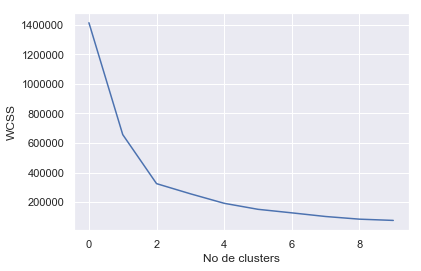

In [6]:
x = df.iloc[:,1:]
wcss = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(wcss);
plt.ylabel('WCSS');
plt.xlabel('No de clusters');

<a name='AGRUPANDO'></a>
<h3>Agrupando</h3>

Utilizando as informações dadas pelo método do cotovelo, primeiro vamos agrupar utilizando 2 clusters.

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)
two_clusters = kmeans.fit_predict(x)

Criado o array indicando cada grupo de cada observação, vamos agrupar utilizando 3 cluster.

In [8]:
kmeans = KMeans(3)
kmeans.fit(x)
three_clusters = kmeans.fit_predict(x)

Com os 2 arrays para 2 e 3 cluster, podemos criar um gráfico comparando ambas.

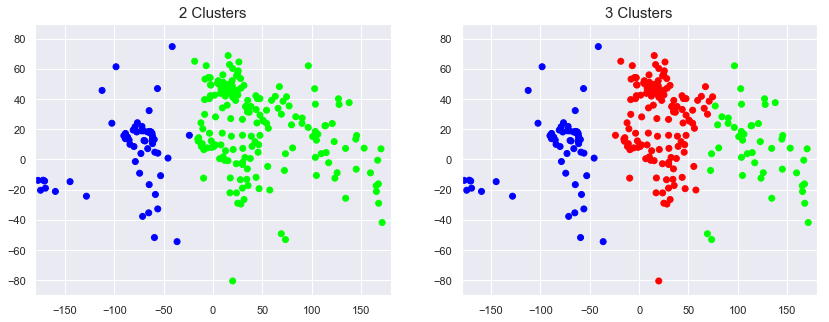

In [9]:
figs, axs = plt.subplots(1,2,figsize=(14,5))
axs[0].scatter(df['Longitude'], df['Latitude'], c=two_clusters, cmap='brg');
axs[0].set_xlim(-180,180)
axs[0].set_ylim(-90,90)
axs[0].set_title('2 Clusters', fontsize=15)
axs[1].scatter(df['Longitude'], df['Latitude'], c=three_clusters, cmap='brg');
axs[1].set_xlim(-180,180)
axs[1].set_ylim(-90,90)
axs[1].set_title('3 Clusters', fontsize=15);

<a href='#INDICE'>Voltar para o índice</a>

<a name='CONCLUSAO'></a>
<h2>Conclusão</h2>

A análise de agrupamento é muito útil tanto antes de começar a análise exploratória para saber com qual cluster irá analisar, como após a análise exploratória, tudo isso pois é muito simples de se entender e rápido de se fazer. Fora isso aqui utilizamos um modelo baseado na média, porém há casos que é necessário utilizar modelos que se baseam na densidade, mas para todos os casos necessários há uma biblioteca que pode ser implantada.<br>
Apesar de todas essas qualidades há alguns pontos contras, entretanto há algumas formas de se remediar desses casos.<br>
O primeiro que é necessário definir o número <i>'k'</i> de clusters, tudo bem que há o método do cotovelo, porém ele não é bem científico e fica a gosto do usuário intepretar o número exato de clusters.<br> 
Depois disso temos outro ponto que o K-means é sensível a inicialização, ou seja, dependendo de onde as cluster seeds são colocadas os resultados podem alterar, entretanto o K-means utiliza um algoritmo iterativo chamado K-means++ que roda antes e localiza o local apropriado para cada cluster seeds.<br>
Outros pontos são que o agrupamento é sensível a outliers e dependendo podem acabar virando um cluster de uma observação e o agrupamento produz solução esféricas, pois é baseado na média, caso seja necessário outro solução será necessário utilizar outro modelo.<br>

<a href='#INDICE'>Voltar para o índice</a>